In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import SimpleRNN, Dense




In [2]:
df=pd.read_csv("data.csv")


# Split THe data First!!!

In [3]:

df.drop(['Patient','tumor_tissue_site'],axis=1,inplace=True)

df_train, df_test= train_test_split(df, test_size=0.2)

# How Big Is The data ?

In [4]:
df_train.shape

(88, 16)

# How does the data look like?

In [5]:
df_train.head(5)

,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
55,2.0,3.0,2,1.0,1.0,2.0,1,2.0,1.0,1.0,6.0,2.0,51.0,3.0,2.0,0.0
26,3.0,2.0,2,3.0,2.0,1.0,3,3.0,1.0,1.0,6.0,1.0,66.0,3.0,2.0,1.0
52,1.0,3.0,1,1.0,4.0,2.0,1,2.0,1.0,3.0,2.0,1.0,69.0,3.0,2.0,0.0
12,NaN,5.0,2,1.0,3.0,2.0,1,1.0,2.0,3.0,5.0,2.0,22.0,3.0,2.0,0.0
103,4.0,3.0,1,1.0,4.0,1.0,1,3.0,1.0,1.0,2.0,1.0,49.0,2.0,2.0,0.0


# what is the data type of the collumn?

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 55 to 96
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RNASeqCluster              73 non-null     float64
 1   MethylationCluster         87 non-null     float64
 2   miRNACluster               88 non-null     int64  
 3   CNCluster                  86 non-null     float64
 4   RPPACluster                77 non-null     float64
 5   OncosignCluster            86 non-null     float64
 6   COCCluster                 88 non-null     int64  
 7   histological_type          88 non-null     float64
 8   neoplasm_histologic_grade  88 non-null     float64
 9   laterality                 88 non-null     float64
 10  tumor_location             88 non-null     float64
 11  gender                     88 non-null     float64
 12  age_at_initial_pathologic  88 non-null     float64
 13  race                       87 non-null     float64


 # Are there any missing Values?

In [7]:
df_train.isnull().sum()

RNASeqCluster                15
MethylationCluster            1
miRNACluster                  0
CNCluster                     2
RPPACluster                  11
OncosignCluster               2
COCCluster                    0
histological_type             0
neoplasm_histologic_grade     0
laterality                    0
tumor_location                0
gender                        0
age_at_initial_pathologic     0
race                          1
ethnicity                     6
death01                       0
dtype: int64

In [8]:
df_train.isnull().mean()*100

RNASeqCluster                17.045455
MethylationCluster            1.136364
miRNACluster                  0.000000
CNCluster                     2.272727
RPPACluster                  12.500000
OncosignCluster               2.272727
COCCluster                    0.000000
histological_type             0.000000
neoplasm_histologic_grade     0.000000
laterality                    0.000000
tumor_location                0.000000
gender                        0.000000
age_at_initial_pathologic     0.000000
race                          1.136364
ethnicity                     6.818182
death01                       0.000000
dtype: float64

# Create a KNNImputer object to impute missing Values

In [9]:
knn_imputer = KNNImputer()
param_grid = {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(knn_imputer, param_grid,scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(df_train)
print("Best parameters:", grid_search.best_params_)




Best parameters: {'n_neighbors': 1}


In [10]:
knn_object=KNNImputer(n_neighbors=1)
df_trf_train=knn_object.fit_transform(df_train)
df_trf_test=knn_object.transform(df_test)

In [11]:
train1=pd.DataFrame(df_trf_train,columns=df_train.columns)
test1=pd.DataFrame(df_trf_test,columns=df_test.columns)

# how does the data look mathematically?

In [12]:
train1.describe()

,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2.352273,3.602273,1.943182,1.738636,2.488636,1.886364,1.795455,2.147727,1.522727,2.090909,3.613636,1.454545,45.715909,2.886364,1.965909,0.238636
std,1.174830,1.160061,0.807408,0.864289,1.114113,0.685344,0.859819,0.864893,0.502346,0.990023,1.908431,0.500783,13.899433,0.319188,0.182503,0.428693
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,2.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,33.750000,3.000000,2.000000,0.000000
50%,2.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,45.500000,3.000000,2.000000,0.000000
75%,4.000000,5.000000,2.000000,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000,6.000000,2.000000,57.250000,3.000000,2.000000,0.000000
max,4.000000,5.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,6.000000,2.000000,75.000000,3.000000,2.000000,1.000000


# Are there any duplicate values?

In [13]:
train1.duplicated().sum()

0

# Drop duplicate row

In [14]:
train1.drop_duplicates(inplace=True)

In [15]:
train1.duplicated().sum()


0

In [16]:
test1.duplicated().sum()

0

# how is the correlation between collumns?

In [17]:
train1.corr()

,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
RNASeqCluster,1.000000,-0.385177,-0.330064,0.340758,0.332406,-0.306603,0.322487,0.355431,-0.023460,0.100620,-0.123155,-0.118998,0.125158,-0.045281,0.110264,-0.100366
MethylationCluster,-0.385177,1.000000,0.184216,-0.391474,-0.257001,0.332849,-0.382116,-0.433379,0.183345,-0.038213,0.137466,0.097130,-0.323597,-0.154506,0.043803,-0.061197
miRNACluster,-0.330064,0.184216,1.000000,-0.120353,-0.198783,0.175146,-0.066604,-0.185360,0.159085,-0.094120,0.037806,0.121463,0.115306,0.019259,-0.013296,0.139247
CNCluster,0.340758,-0.391474,-0.120353,1.000000,0.169965,-0.361197,0.917140,0.359776,0.080024,0.122119,-0.284920,0.091741,0.435793,0.057763,0.161475,-0.015864
RPPACluster,0.332406,-0.257001,-0.198783,0.169965,1.000000,-0.031818,0.093537,0.174727,0.175036,0.146840,-0.045337,-0.114245,0.182755,0.319552,0.082868,0.017776
OncosignCluster,-0.306603,0.332849,0.175146,-0.361197,-0.031818,1.000000,-0.371498,-0.417356,0.207906,-0.052362,0.256053,0.051758,0.096723,-0.007165,0.060569,0.171605
COCCluster,0.322487,-0.382116,-0.066604,0.917140,0.093537,-0.371498,1.000000,0.381143,0.090721,0.089610,-0.335913,0.084937,0.423075,0.081860,0.101550,0.009213
histological_type,0.355431,-0.433379,-0.185360,0.359776,0.174727,-0.417356,0.381143,1.000000,-0.259143,0.158644,-0.187862,0.028951,0.104882,0.061508,0.032272,0.058831
neoplasm_histologic_grade,-0.023460,0.183345,0.159085,0.080024,0.175036,0.207906,0.090721,-0.259143,1.000000,0.065133,-0.050683,0.049844,0.163085,0.087978,0.071235,0.268084
laterality,0.100620,-0.038213,-0.094120,0.122119,0.146840,-0.052362,0.089610,0.158644,0.065133,1.000000,-0.108951,0.031614,-0.091654,0.033067,0.017350,0.029545


In [18]:
train1.corr()["death01"]

RNASeqCluster               -0.100366
MethylationCluster          -0.061197
miRNACluster                 0.139247
CNCluster                   -0.015864
RPPACluster                  0.017776
OncosignCluster              0.171605
COCCluster                   0.009213
histological_type            0.058831
neoplasm_histologic_grade    0.268084
laterality                   0.029545
tumor_location               0.113992
gender                      -0.029204
age_at_initial_pathologic    0.268069
race                        -0.051547
ethnicity                   -0.041737
death01                      1.000000
Name: death01, dtype: float64

In [19]:
series1=train1.value_counts("RNASeqCluster")
series1

RNASeqCluster
1.0    27
2.0    26
4.0    23
3.0    12
dtype: int64

# which has the highest negative correlation with the target column-> death01

In [20]:
series1.index

Float64Index([1.0, 2.0, 4.0, 3.0], dtype='float64', name='RNASeqCluster')

In [21]:
series1.values

array([27, 26, 23, 12], dtype=int64)

<Axes: >

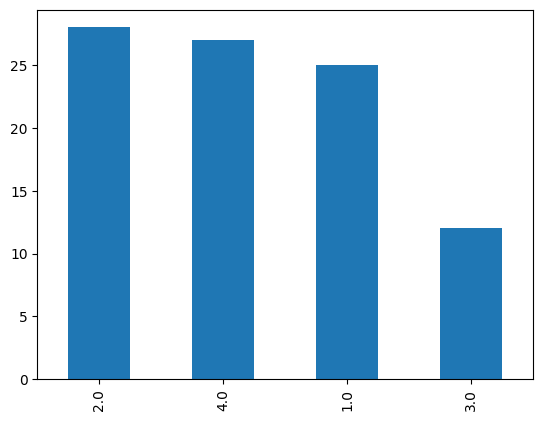

In [22]:
df["RNASeqCluster"].value_counts().plot(kind="bar")

# Standardization

In [23]:
#building a standardization model

In [24]:
scaler=StandardScaler( with_mean=False)
scaler.fit(train1)




StandardScaler(with_mean=False)

In [25]:
#scaling the training parameters
train2=scaler.transform(train1)

#scaling the test parameters
test2=scaler.transform(test1)


print("train2: ",train2.shape )
print("test2: ",test2.shape )


train2:  (88, 16)
test2:  (22, 16)


In [26]:
print(train2)


[[ 1.7121303   2.60089055  2.49125901 ...  9.45271634 11.02154752
   0.        ]
 [ 2.56819546  1.73392703  2.49125901 ...  9.45271634 11.02154752
   2.34604114]
 [ 0.85606515  2.60089055  1.24562951 ...  9.45271634 11.02154752
   0.        ]
 ...
 [ 1.7121303   3.46785407  4.98251803 ...  9.45271634 11.02154752
   2.34604114]
 [ 3.42426061  2.60089055  2.49125901 ...  6.30181089 11.02154752
   2.34604114]
 [ 1.7121303   3.46785407  3.73688852 ...  9.45271634  5.51077376
   2.34604114]]


In [27]:
train2.shape


(88, 16)

In [28]:
data=np.concatenate((train2,test2), axis=0)

In [29]:
data

array([[ 1.7121303 ,  2.60089055,  2.49125901, ...,  9.45271634,
        11.02154752,  0.        ],
       [ 2.56819546,  1.73392703,  2.49125901, ...,  9.45271634,
        11.02154752,  2.34604114],
       [ 0.85606515,  2.60089055,  1.24562951, ...,  9.45271634,
        11.02154752,  0.        ],
       ...,
       [ 1.7121303 ,  2.60089055,  2.49125901, ...,  9.45271634,
        11.02154752,  0.        ],
       [ 3.42426061,  1.73392703,  2.49125901, ...,  9.45271634,
        11.02154752,  0.        ],
       [ 2.56819546,  2.60089055,  2.49125901, ...,  9.45271634,
        11.02154752,  0.        ]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)

# build the model

In [47]:
model = Sequential()
model.add(SimpleRNN(32,activation='ReLU', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])




In [32]:
# model = Sequential()
# model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])

In [48]:
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=5, validation_split=0.2)

Epoch 1/5
3/3 [==============================] - 1s 103ms/step - loss: 8.7884 - accuracy: 0.7571 - val_loss: 12.0625 - val_accuracy: 0.6667
Epoch 2/5
3/3 [==============================] - 0s 15ms/step - loss: 8.7884 - accuracy: 0.7571 - val_loss: 12.0625 - val_accuracy: 0.6667
Epoch 3/5
3/3 [==============================] - 0s 16ms/step - loss: 8.7884 - accuracy: 0.7571 - val_loss: 12.0625 - val_accuracy: 0.6667
Epoch 4/5
3/3 [==============================] - 0s 16ms/step - loss: 8.7884 - accuracy: 0.7571 - val_loss: 12.0625 - val_accuracy: 0.6667
Epoch 5/5
3/3 [==============================] - 0s 16ms/step - loss: 8.7884 - accuracy: 0.7571 - val_loss: 12.0625 - val_accuracy: 0.6667


In [49]:
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
# print("Test loss:", loss)
print("Test accuracy:", accuracy*100)

1/1 [==============================] - 0s 19ms/step - loss: 6.5796 - accuracy: 0.8182
Test accuracy: 81.81818127632141
